# Import Libraries

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import training
import torchvision
import model,utils
import load_data


## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


# Creating training and test Data using Data Loaders

In [ ]:
train_loader,test_loader = load_data.cifar10_train_test_data()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Data Visualization

let's have a look at some of the images the CIFAR10 data set

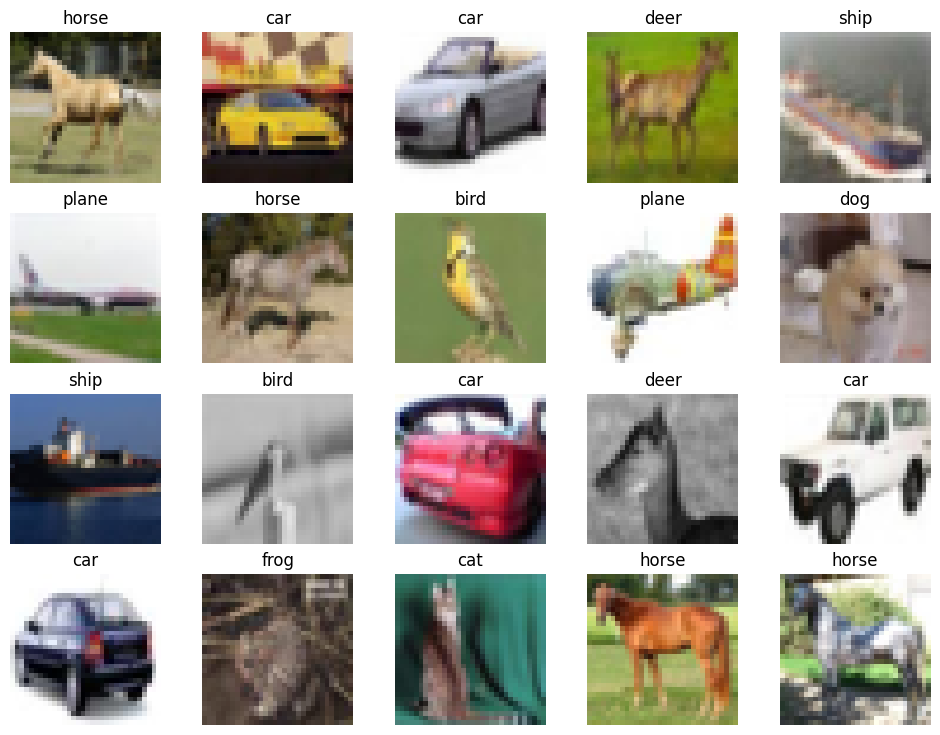

In [ ]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

cols = 5
rows = 4
fig, axs = plt.subplots(rows, cols, figsize=(12, 9))
counter= 0
rnd_idx = list(range(20))
for x in range(rows):
  for y in range(cols):
    axs[x, y].set_title(classes[labels[rnd_idx[counter]]])
    axs[x, y].imshow(utils.imshow_(images[counter]))
    axs[x, y].set_axis_off()
    counter+=1

plt.show()

# Loading our CNN Model and Summarizing the Params

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.NetLayer().to(device)
summary(model, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         LayerNorm-3           [-1, 16, 32, 32]           2,048
         Dropout2d-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
         LayerNorm-7           [-1, 32, 32, 32]           2,048
         Dropout2d-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]              48
           Conv2d-10           [-1, 16, 32, 32]             512
        LayerNorm-11           [-1, 16, 32, 32]           2,048
        Dropout2d-12           [-1, 16, 32, 32]               0

# Let's Train and test our model

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
train_losses = []
train_acc = []
test_losses = []
test_acc = []
EPOCHS = 21
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss , train_accuracy = training.train(model, device, train_loader, optimizer, epoch)
    test_loss , test_accuracy = training.test(model, device, test_loader)
    train_losses.extend(train_loss),train_acc.extend(train_accuracy)
    test_losses.extend(test_loss),test_acc.extend(test_accuracy)

EPOCH: 0


  0%|          | 0/391 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=2.3022685050964355 Batch_id=390 Accuracy=10.83: 100%|██████████| 391/391 [00:20<00:00, 19.03it/s]



Test set: Average loss: 2.3025, Accuracy: 1130/10000 (11.30%)

EPOCH: 1


Loss=2.291658401489258 Batch_id=390 Accuracy=13.07: 100%|██████████| 391/391 [00:18<00:00, 21.20it/s]



Test set: Average loss: 2.2932, Accuracy: 1704/10000 (17.04%)

EPOCH: 2


Loss=1.944279432296753 Batch_id=390 Accuracy=20.27: 100%|██████████| 391/391 [00:18<00:00, 20.73it/s]



Test set: Average loss: 1.8638, Accuracy: 2734/10000 (27.34%)

EPOCH: 3


Loss=1.598380208015442 Batch_id=390 Accuracy=35.65: 100%|██████████| 391/391 [00:20<00:00, 19.38it/s]



Test set: Average loss: 1.4876, Accuracy: 4433/10000 (44.33%)

EPOCH: 4


Loss=1.4378834962844849 Batch_id=390 Accuracy=46.26: 100%|██████████| 391/391 [00:19<00:00, 20.40it/s]



Test set: Average loss: 1.2919, Accuracy: 5331/10000 (53.31%)

EPOCH: 5


Loss=1.4564083814620972 Batch_id=390 Accuracy=52.16: 100%|██████████| 391/391 [00:19<00:00, 20.28it/s]



Test set: Average loss: 1.2020, Accuracy: 5662/10000 (56.62%)

EPOCH: 6


Loss=1.1317775249481201 Batch_id=390 Accuracy=56.00: 100%|██████████| 391/391 [00:19<00:00, 20.30it/s]



Test set: Average loss: 1.1132, Accuracy: 6056/10000 (60.56%)

EPOCH: 7


Loss=1.046189546585083 Batch_id=390 Accuracy=58.75: 100%|██████████| 391/391 [00:18<00:00, 21.37it/s]



Test set: Average loss: 1.0414, Accuracy: 6336/10000 (63.36%)

EPOCH: 8


Loss=1.0164457559585571 Batch_id=390 Accuracy=61.10: 100%|██████████| 391/391 [00:19<00:00, 19.93it/s]



Test set: Average loss: 1.0031, Accuracy: 6513/10000 (65.13%)

EPOCH: 9


Loss=0.953815758228302 Batch_id=390 Accuracy=62.21: 100%|██████████| 391/391 [00:18<00:00, 21.12it/s]



Test set: Average loss: 0.9801, Accuracy: 6588/10000 (65.88%)

EPOCH: 10


Loss=0.9871639013290405 Batch_id=390 Accuracy=63.98: 100%|██████████| 391/391 [00:18<00:00, 20.99it/s]



Test set: Average loss: 0.9382, Accuracy: 6692/10000 (66.92%)

EPOCH: 11


Loss=0.8715778589248657 Batch_id=390 Accuracy=64.93: 100%|██████████| 391/391 [00:20<00:00, 18.89it/s]



Test set: Average loss: 0.9276, Accuracy: 6754/10000 (67.54%)

EPOCH: 12


Loss=1.0572561025619507 Batch_id=390 Accuracy=65.84: 100%|██████████| 391/391 [00:20<00:00, 19.26it/s]



Test set: Average loss: 0.8952, Accuracy: 6914/10000 (69.14%)

EPOCH: 13


Loss=1.0239042043685913 Batch_id=390 Accuracy=67.05: 100%|██████████| 391/391 [00:18<00:00, 20.62it/s]



Test set: Average loss: 0.8753, Accuracy: 6957/10000 (69.57%)

EPOCH: 14


Loss=0.9838699102401733 Batch_id=390 Accuracy=67.47: 100%|██████████| 391/391 [00:19<00:00, 19.65it/s]



Test set: Average loss: 0.8775, Accuracy: 6977/10000 (69.77%)

EPOCH: 15


Loss=0.8492414355278015 Batch_id=390 Accuracy=68.37: 100%|██████████| 391/391 [00:20<00:00, 19.18it/s]



Test set: Average loss: 0.8509, Accuracy: 7065/10000 (70.65%)

EPOCH: 16


Loss=1.0316083431243896 Batch_id=390 Accuracy=68.68: 100%|██████████| 391/391 [00:19<00:00, 20.07it/s]



Test set: Average loss: 0.8346, Accuracy: 7109/10000 (71.09%)

EPOCH: 17


Loss=0.9856842160224915 Batch_id=390 Accuracy=69.35: 100%|██████████| 391/391 [00:19<00:00, 20.17it/s]



Test set: Average loss: 0.8221, Accuracy: 7145/10000 (71.45%)

EPOCH: 18


Loss=0.8472273945808411 Batch_id=390 Accuracy=69.75: 100%|██████████| 391/391 [00:20<00:00, 18.78it/s]



Test set: Average loss: 0.8371, Accuracy: 7123/10000 (71.23%)

EPOCH: 19


Loss=0.6025346517562866 Batch_id=390 Accuracy=70.02: 100%|██████████| 391/391 [00:19<00:00, 20.50it/s]



Test set: Average loss: 0.8220, Accuracy: 7174/10000 (71.74%)

EPOCH: 20


Loss=0.8486968874931335 Batch_id=390 Accuracy=70.61: 100%|██████████| 391/391 [00:18<00:00, 20.89it/s]



Test set: Average loss: 0.8049, Accuracy: 7211/10000 (72.11%)



## Plotting the Training and Test Losses and accuracy

Text(0.5, 1.0, 'Test Accuracy')

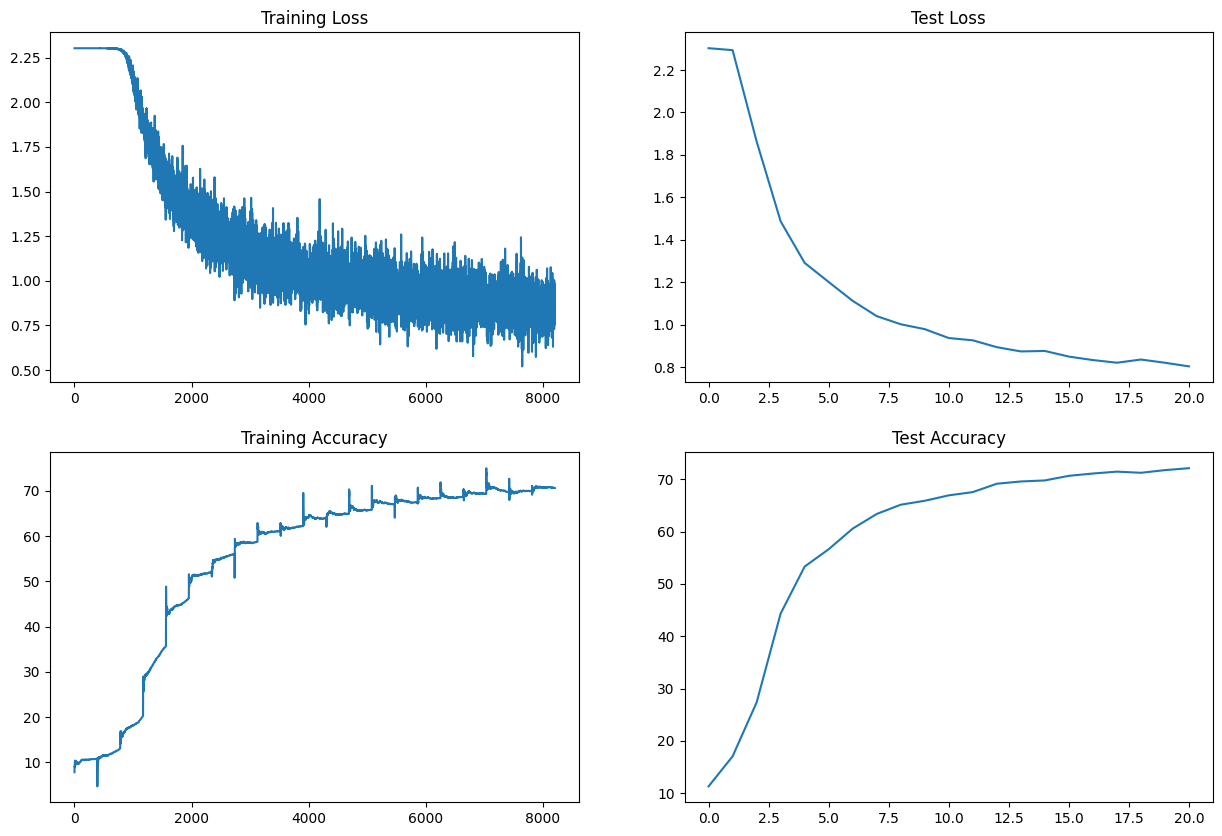

In [ ]:
t = [t_items.item() for t_items in train_losses]
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

### Missclassified Images

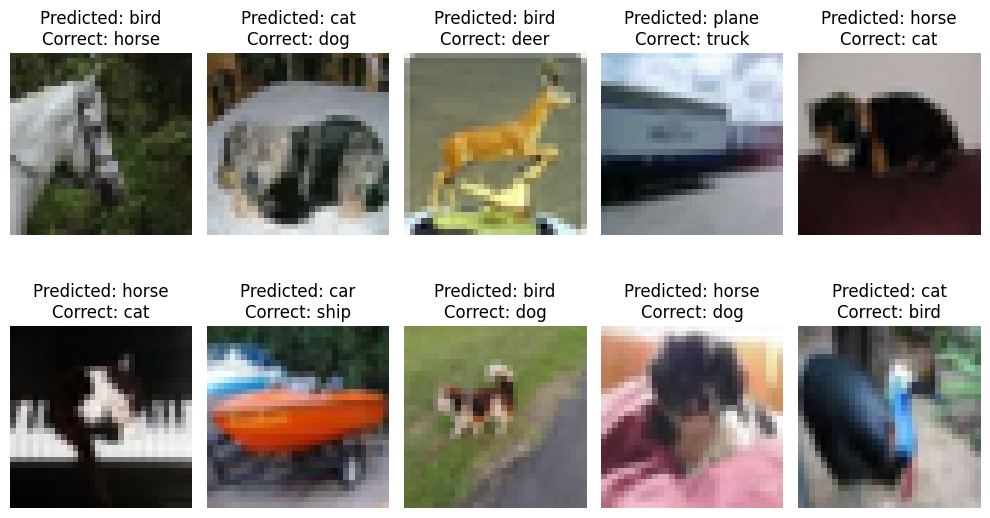

In [ ]:
utils.missclassified_plotting(model,device,test_loader)